<a href="https://colab.research.google.com/github/Johnny-DF26/Deep_Learning/blob/main/Classificacao_de_emocoes(alegria_raiva).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import zipfile
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from google.colab.patches import cv2_imshow
from keras.regularizers import l2

## Extração da base de dados

In [5]:
path_zip = '/content/drive/MyDrive/Visão Computacional Guia Completo/Visão Computacional Guia Completo/Datasets/fer2013_2_classes.zip'
with zipfile.ZipFile(file=path_zip, mode='r') as f:
    f.extractall('./dataset')

## Base de dados

In [88]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7, zoom_range=0.2, horizontal_flip=True)
dataset_treinamento = gerador_treinamento.flow_from_directory('./dataset/fer2013_2_classes/train/', target_size=(48,48), shuffle=True,
                                                              batch_size=32, class_mode='categorical')

Found 11210 images belonging to 2 classes.


In [89]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('./dataset/fer2013_2_classes/validation/', target_size=(48,48), shuffle=False, batch_size=1,
                                                  class_mode='categorical')

Found 1370 images belonging to 2 classes.


## Rede Neural Convolucional

In [125]:
network = keras.models.Sequential()
network.add(keras.layers.Input(shape=(48, 48, 3)))

network.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
network.add(keras.layers.Dropout(0.2))

network.add(keras.layers.Conv2D(filters=2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Conv2D(filters=2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
network.add(keras.layers.Dropout(0.2))

network.add(keras.layers.Conv2D(filters=2*2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Conv2D(filters=2*2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
network.add(keras.layers.Dropout(0.2))

network.add(keras.layers.Conv2D(filters=2*2*2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Conv2D(filters=2*2*2*32, kernel_size=(3,3), padding='same', activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
network.add(keras.layers.Dropout(0.2))

network.add(keras.layers.Flatten())
network.add(keras.layers.Dense(units=64, activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Dropout(0.2))
network.add(keras.layers.Dense(units=64, activation='relu'))
network.add(keras.layers.BatchNormalization())
network.add(keras.layers.Dropout(0.2))

network.add(keras.layers.Dense(units=2, activation='softmax'))


In [ ]:
network.summary()

In [128]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
historico = network.fit(dataset_treinamento, epochs=50)

Epoch 1/50
351/351 [==============================] - 25s 50ms/step - loss: 0.3501 - accuracy: 0.8449
Epoch 2/50
351/351 [==============================] - 17s 49ms/step - loss: 0.3166 - accuracy: 0.8633
Epoch 3/50
351/351 [==============================] - 18s 52ms/step - loss: 0.2963 - accuracy: 0.8749
Epoch 4/50
351/351 [==============================] - 17s 49ms/step - loss: 0.2804 - accuracy: 0.8819
Epoch 5/50
351/351 [==============================] - 17s 49ms/step - loss: 0.2714 - accuracy: 0.8872
Epoch 6/50
351/351 [==============================] - 17s 49ms/step - loss: 0.2574 - accuracy: 0.8921
Epoch 7/50
351/351 [==============================] - 17s 49ms/step - loss: 0.2423 - accuracy: 0.8974
Epoch 8/50
351/351 [==============================] - 19s 53ms/step - loss: 0.2279 - accuracy: 0.9084
Epoch 9/50
351/351 [==============================] - 17s 49ms/step - loss: 0.2280 - accuracy: 0.9086
Epoch 10/50
351/351 [==============================] - 17s 49ms/step - loss: 0.213

## Avaliação da rede neural

In [129]:
previsao = network.predict(dataset_teste)
previsao = np.argmax(previsao, axis=1)
previsao

1370/1370 [==============================] - 5s 3ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [130]:
dataset_teste.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [132]:
accuracy_score(dataset_teste.classes, previsao)

0.9291970802919708

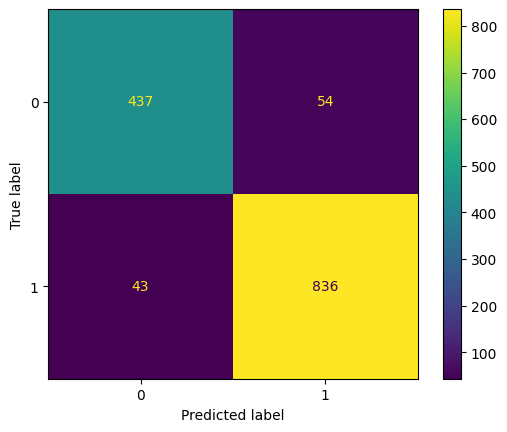

In [133]:
cm = confusion_matrix(dataset_teste.classes, previsao)
fig = ConfusionMatrixDisplay(cm)
fig.plot();

## Salvando a rede

In [136]:
rede = network.to_json()
with open('classificador_emocoes_alegria_raiva.json', 'w') as f:
    f.write(rede)
network.save_weights('weights_emocoes_alegria_raiva.hdf5')